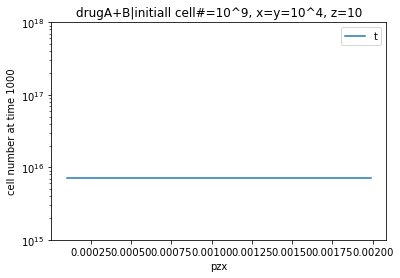

<Figure size 432x288 with 0 Axes>

In [1]:
#!/usr/bin/python

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import matplotlib as mpl

def dync(x, t, *arg):
    (qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α)))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

α = 0.00000001

initial_N = 10**9
X = 10**4
Y = 10**4
Z = 10
W = initial_N-X-Y-Z
t_end = 1000

qzw = 0.2
pzw = 0.0009
qzx = 0.025
# pzx = 0.0009
qzy = 0.025
pzy = 0.0009

a = -0.064
b = -0.03355
c = -0.03355

f = 0.022
g = 0.0000001 
h = 0.0000001 
k = 0.0000001 
p = 0.0000001 
q = 0.0000001

x = list()
finalnumber = list()

for pzx in np.arange(0.0001, 0.002, 0.00001):
    x.append(pzx)
    paramsC = (qzw, pzw, qzx, pzx, qzx, pzy, a, b, c, f, g, h, k, p, q )
    list_t = np.arange(0, t_end, 0.01)
    cell_init = (W, X, Y, Z)
    cells = odeint(dync, cell_init, list_t, args = paramsC)
    celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
    finalnumber.append(celltotal[-1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, finalnumber)
fig = plt.figure()

ax.legend('total cell number')

ax.set_yscale('log')

# ax.set_xlim(0, 1)
ax.set_ylim(10**15, 10**18)
ax.set_xlabel('pzx')
ax.set_ylabel('cell number at time 1000') 
ax.set_title('drugA+B|initiall cell#=10^9, x=y=10^4, z=10')

plt.show()